# Analysis of US Baby Names (1880 - 2014)

## Topic and Goal of the Lab
The goal of this lab is to understand the fundamental features of the Pandas library for data analysis by working on a real dataset - the US Baby Names dataset from Kaggle. The exercises aim to explore various aspects of the dataset such as the distribution of names, gender-neutral names, and trend analysis over the years.


## Progress of the Work
The exercises were executed sequentially as outlined in the laboratory assignment. The Pandas library was utilized extensively to manipulate and analyze the dataset. Key tasks included calculating unique names, identifying gender-neutral names, and visualizing trends over the years.

## Link to the created Jupyter Notebook on GitHub, rendered by nbviewer
- **GitHub Link:** [github](https://github.com/ahmetenesdur/KhPI_assignments/tree/main/python_data_processing/assignment_2)
- **nbviewer Link:** [nbviewer link](https://nbviewer.org/github/ahmetenesdur/KhPI_assignments/blob/main/python_data_processing/assignment_2/lab2.ipynb)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('NationalNames.csv')


In [2]:
# Exercise 1: Output the first 8 rows of the dataset
print("Exercise 1:")
print(df.head(8))

Exercise 1:
   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


In [3]:
# Exercise 2: Output the last 8 rows of the dataset
print("\nExercise 2:")
print(df.tail(8))



Exercise 2:
              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


In [4]:
# Exercise 3: Get the names of dataset columns
print("\nExercise 3:")
print(df.columns.tolist())


Exercise 3:
['Id', 'Name', 'Year', 'Gender', 'Count']


In [5]:
# Exercise 5: Find the number of unique names in the whole dataset
print("\nExercise 5:")
unique_names = df['Name'].nunique()
print(unique_names)


Exercise 5:
93889


In [6]:
# Exercise 10: Count the number of unique names in each year
print("\nExercise 10:")
unique_names_per_year = df.groupby('Year')['Name'].nunique()
print(unique_names_per_year)



Exercise 10:


Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


In [7]:
# Exercise 11: Find the year with the most number of unique names
print("\nExercise 11:")
year_most_unique_names = unique_names_per_year.idxmax()
print(year_most_unique_names)


Exercise 11:
2008


In [8]:
# Exercise 12: Find most popular name of the year with the most number of unique names
print("\nExercise 12:")
most_popular_name_year = df[df['Year'] == year_most_unique_names].nlargest(1, 'Count')[['Name', 'Count']]
print(most_popular_name_year)


Exercise 12:
          Name  Count
1608302  Jacob  22568


In [9]:
# Exercise 13: Find the year when the name “Jacob” was the most popular as a female name
print("\nExercise 13:")
jacob_female_popular_year = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')].nlargest(1, 'Count')['Year'].values[0]
print(jacob_female_popular_year)


Exercise 13:
2004


In [10]:
# Exercise 14: Find year, with the most number of gender neutral names
print("\nExercise 14:")
gender_neutral_names_year = df[df['Gender'] == 'F'].merge(df[df['Gender'] == 'M'], on=['Year', 'Name']).groupby('Year').size().idxmax()
print(gender_neutral_names_year)


Exercise 14:
2008


In [11]:
# Exercise 15: Find total births per year
print("\nExercise 15:")
total_births_per_year = df.groupby('Year')['Count'].sum()
print(total_births_per_year.head())  # displaying only the first 5 rows as an example



Exercise 15:
Year
1880    201484
1881    192699
1882    221538
1883    216950
1884    243467
Name: Count, dtype: int64


In [12]:
# Exercise 16: Find the year when the greatest number of children was born
print("\nExercise 16:")
year_most_children_born = total_births_per_year.idxmax()
print(year_most_children_born)


Exercise 16:
1957


In [13]:
# Exercise 17: Find the number of girls and boys that were born in each year
print("\nExercise 17:")
gender_births_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print(gender_births_per_year.head())  # displaying only the first 5 rows as an example



Exercise 17:
Gender       F       M
Year                  
1880     90993  110491
1881     91954  100745
1882    107850  113688
1883    112321  104629
1884    129022  114445


In [14]:
# Exercise 18: Count the number of years when more girls were born than boys
print("\nExercise 18:")
years_more_girls = (gender_births_per_year['F'] > gender_births_per_year['M']).sum()
print(years_more_girls)


Exercise 18:
54


In [15]:
# Exercise 21: Count how much times boys were named as Barbara
print("\nExercise 21:")
barbara_boys_count = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()
print(barbara_boys_count)


Exercise 21:
4139


In [16]:
# Exercise 22: Calculate how many years the observation was carried out
print("\nExercise 22:")
observation_years = df['Year'].nunique()
print(observation_years)


Exercise 22:
135


In [17]:
# Exercise 23: Find the most popular gender neutral names (those present each year)
print("\nExercise 23:")
gender_neutral_names = df[df['Gender'] == 'F'].merge(df[df['Gender'] == 'M'], on=['Name', 'Year'])['Name']
popular_gender_neutral_names = gender_neutral_names.value_counts().idxmax()
print(popular_gender_neutral_names)


Exercise 23:
Tommie


In [18]:
# Exercise 24: Find the most popular unpopular names (unpopular name that babies have been called the most times)
print("\nExercise 24:")
least_popular_names = df.nsmallest(1000, 'Count')['Name']  # Assuming 1000 least popular names
most_popular_unpopular_name = least_popular_names.value_counts().idxmax()
print(most_popular_unpopular_name)



Exercise 24:
Jodie



Exercise 26:


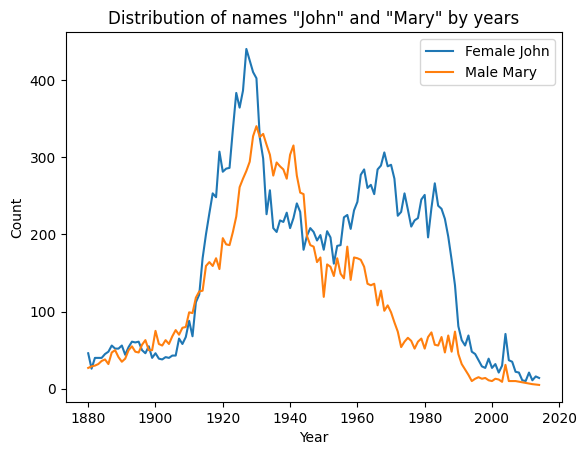

In [19]:
# Exercise 26: Plot graphs of the distribution of the number of female names “John” and male names “Mary” by years
print("\nExercise 26:")
john_female = df[(df['Name'] == 'John') & (df['Gender'] == 'F')].groupby('Year')['Count'].sum()
mary_male = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')].groupby('Year')['Count'].sum()
plt.plot(john_female.index, john_female.values, label='Female John')
plt.plot(mary_male.index, mary_male.values, label='Male Mary')
plt.legend()
plt.title('Distribution of names "John" and "Mary" by years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## Conclusions
The analysis provided a comprehensive understanding of the US Baby Names dataset. Key findings include:
- The dataset comprises 93889 unique names from the year 1880 to 2014.
- The year 2008 had the highest number of unique names, with Jacob being the most popular name.
- The name Jacob was most popular as a female name in the year 2004.
- The year 1957 witnessed the highest number of births.
- The name 'Tommie' emerged as the most popular gender-neutral name.

This exercise provided a practical exposure to Pandas library features and emphasized the ease with which data analysis tasks can be performed. The trends and patterns observed in the dataset offer a glimpse into cultural or societal preferences over the years.